In [2]:
import pandas as pd
import os

In [3]:
train_movie_data = pd.read_csv('labeledTrainData.tsv', header=0, sep='\t')
train_movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9060 entries, 0 to 9059
Data columns (total 3 columns):
id           9060 non-null object
sentiment    9060 non-null int64
review       9060 non-null object
dtypes: int64(1), object(2)
memory usage: 212.4+ KB


In [4]:
train_movie_data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [5]:
train_movie_data.shape

(9060, 3)

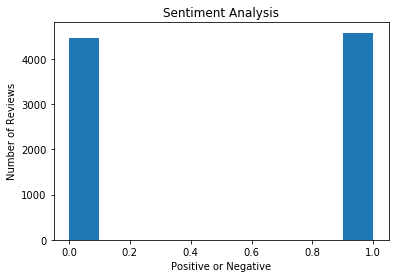

In [6]:
import matplotlib.pyplot as plt

plt.hist(train_movie_data['sentiment'], range=(0, 1))
plt.title("Sentiment Analysis")
plt.xlabel("Positive or Negative")
plt.ylabel("Number of Reviews")
plt.show()

<h2>In the following section we'll be performing data cleaning and preprocessing</h2>

In [7]:
from bs4 import BeautifulSoup # use BeautifulSoup to parse the text

In [8]:
train_movie_data['review_bs'] = train_movie_data['review'].apply(lambda x: BeautifulSoup(x, 'html.parser'))

train_movie_data.review_bs[0].get_text() #== 
#print "2nd..", train_movie_data['review'][0]
#assert str(review1.get_text()) == str(train_movie_data['review'][0])
 

u"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature film bit when it finally starts is only on for 20 m

<b>remove numbers and puntuations</b>

In [9]:
import re
train_movie_data['modified_review1'] = train_movie_data['review_bs'].apply(lambda x: re.sub(r'[^a-zA-Z]', ' ', x.get_text()))
train_movie_data['modified_review1'][0]

u'With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    m

In [10]:
train_movie_data['review_words'] = train_movie_data['modified_review1'].apply(lambda x: x.lower().split())

In [11]:
train_movie_data['review_words'][0]

[u'with',
 u'all',
 u'this',
 u'stuff',
 u'going',
 u'down',
 u'at',
 u'the',
 u'moment',
 u'with',
 u'mj',
 u'i',
 u've',
 u'started',
 u'listening',
 u'to',
 u'his',
 u'music',
 u'watching',
 u'the',
 u'odd',
 u'documentary',
 u'here',
 u'and',
 u'there',
 u'watched',
 u'the',
 u'wiz',
 u'and',
 u'watched',
 u'moonwalker',
 u'again',
 u'maybe',
 u'i',
 u'just',
 u'want',
 u'to',
 u'get',
 u'a',
 u'certain',
 u'insight',
 u'into',
 u'this',
 u'guy',
 u'who',
 u'i',
 u'thought',
 u'was',
 u'really',
 u'cool',
 u'in',
 u'the',
 u'eighties',
 u'just',
 u'to',
 u'maybe',
 u'make',
 u'up',
 u'my',
 u'mind',
 u'whether',
 u'he',
 u'is',
 u'guilty',
 u'or',
 u'innocent',
 u'moonwalker',
 u'is',
 u'part',
 u'biography',
 u'part',
 u'feature',
 u'film',
 u'which',
 u'i',
 u'remember',
 u'going',
 u'to',
 u'see',
 u'at',
 u'the',
 u'cinema',
 u'when',
 u'it',
 u'was',
 u'originally',
 u'released',
 u'some',
 u'of',
 u'it',
 u'has',
 u'subtle',
 u'messages',
 u'about',
 u'mj',
 u's',
 u'feeling'

In [12]:
#words = modified_review1.split()

In [13]:
import nltk
from nltk.corpus import stopwords
#nltk.download()

In [14]:

print stopwords.words("english")

[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u'her', u'hers', u'herself', u'it', u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out', u'on', u'off', u'over', u'under', u'again', u'further', u'then', u'once', u'here', u'there', u'when', u'where', u'why', u'how', u'all', u'any', u'both', u'each', u'few', u'more', u'most', u'other', u'some', u'such', u'no', u'nor', u

In [15]:
stopwords_set = set(stopwords.words("english"))
train_movie_data['review_meaningful_words'] = train_movie_data['review_words'].apply(lambda x: [w for w in x if not w in stopwords_set])

In [16]:
removed_words = len(train_movie_data['review_words'][0]) - len(train_movie_data['review_meaningful_words'][0])

In [17]:
print (removed_words)

218


In [18]:
#words = [w for w in words if not w in stopwords.words("english")]
#print words
train_movie_data['reviewed_cleaned'] = train_movie_data['review_meaningful_words'].apply(lambda x: ' '.join(x))

In [19]:
#print train_movie_data
from IPython.display import display
#train_movie_data.drop(['review', 'review_bs', 'modified_review1', 'review_words', 'review_meaningful_words'], axis=1, inplace=True)
display(train_movie_data.head())

,id,sentiment,review,review_bs,modified_review1,review_words,review_meaningful_words,reviewed_cleaned
0,5814_8,1,With all this stuff going down at the moment w...,With all this stuff going down at the moment w...,With all this stuff going down at the moment w...,"[with, all, this, stuff, going, down, at, the,...","[stuff, going, moment, mj, started, listening,...",stuff going moment mj started listening music ...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...","\The Classic War of the Worlds\"" by Timothy Hi...",The Classic War of the Worlds by Timothy Hi...,"[the, classic, war, of, the, worlds, by, timot...","[classic, war, worlds, timothy, hines, enterta...",classic war worlds timothy hines entertaining ...
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,The film starts with a manager (Nicholas Bell)...,The film starts with a manager Nicholas Bell ...,"[the, film, starts, with, a, manager, nicholas...","[film, starts, manager, nicholas, bell, giving...",film starts manager nicholas bell giving welco...
3,3630_4,0,It must be assumed that those who praised this...,It must be assumed that those who praised this...,It must be assumed that those who praised this...,"[it, must, be, assumed, that, those, who, prai...","[must, assumed, praised, film, greatest, filme...",must assumed praised film greatest filmed oper...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,Superbly trashy and wondrously unpretentious 8...,Superbly trashy and wondrously unpretentious ...,"[superbly, trashy, and, wondrously, unpretenti...","[superbly, trashy, wondrously, unpretentious, ...",superbly trashy wondrously unpretentious explo...


In [20]:
print(train_movie_data['reviewed_cleaned'][0])

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer="word", preprocessor=None, tokenizer=None, stop_words=None, max_features=5000)

In [22]:
train_data_features = vectorizer.fit_transform(list(train_movie_data['reviewed_cleaned'].values))

In [23]:
train_data_features = train_data_features.toarray()

In [24]:
train_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
train_data_features.shape

(9060, 5000)

In [26]:
len(train_data_features)

9060

In [27]:
vocab = vectorizer.get_feature_names()
print(vocab)

[u'abandoned', u'abc', u'abilities', u'ability', u'able', u'abraham', u'absence', u'absolute', u'absolutely', u'absurd', u'abuse', u'abusive', u'academy', u'accent', u'accents', u'accept', u'acceptable', u'accepted', u'accepts', u'access', u'accident', u'accidentally', u'accomplish', u'accomplished', u'according', u'account', u'accurate', u'accused', u'achieve', u'achieved', u'achievement', u'across', u'act', u'acted', u'acting', u'action', u'actions', u'active', u'actor', u'actors', u'actress', u'actresses', u'acts', u'actual', u'actually', u'ad', u'adam', u'adams', u'adaptation', u'adapted', u'add', u'added', u'addicted', u'adding', u'addition', u'adds', u'adequate', u'admire', u'admit', u'admittedly', u'adolescent', u'adorable', u'adult', u'adults', u'advance', u'advanced', u'advantage', u'adventure', u'adventures', u'advertising', u'advice', u'advise', u'affair', u'affairs', u'affect', u'affected', u'afford', u'aforementioned', u'afraid', u'africa', u'african', u'afternoon', u'afte

In [30]:
import numpy as np
dist = np.sum(train_data_features, axis=0)

vocab_count = {}
# For each, print the vocabulary word and the number of times it 
# appears in the training set
for count, tag in sorted([(count, tag) for tag, count in zip(vocab, dist)], reverse=True)[1:20]:
    print(count, tag)
    vocab_count[tag] = count

(15178, u'film')
(9663, u'one')
(7469, u'like')
(5594, u'good')
(4645, u'time')
(4585, u'even')
(4491, u'would')
(4288, u'really')
(4252, u'story')
(4225, u'see')
(3855, u'well')
(3509, u'much')
(3434, u'people')
(3390, u'get')
(3360, u'also')
(3323, u'bad')
(3322, u'great')
(3241, u'first')
(3018, u'made')


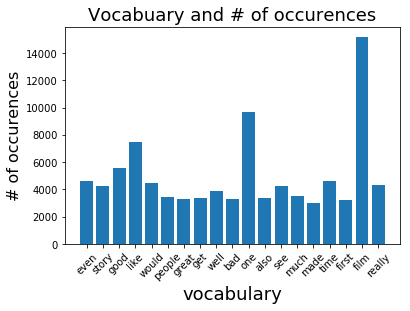

In [44]:
# plot the number of occurences of vocabs

plt.bar(range(len(vocab_count)), vocab_count.values(), align='center')
plt.xticks(range(len(vocab_count)), vocab_count.keys(), rotation=45)
plt.xlabel('vocabulary', fontsize=18)
plt.ylabel('# of occurences', fontsize=16)
plt.title("Vocabuary and # of occurences", fontsize=18)

plt.show()

In [57]:
def clean_reviews(reviews, remove_stopwords=False):

    reviews_text = list(map(lambda x: BeautifulSoup(x, 'html.parser').get_text(), reviews))

    reviews_text = list(map(lambda x: re.sub("[^a-zA-Z]"," ", x), reviews_text))

    words = list(map(lambda x: x.lower().split(), reviews_text))

    if remove_stopwords:
        set_of_stopwords = set(stopwords.words("english"))
        meaningful_words = list(map(lambda x: [w for w in x if not w in set_of_stopwords], words))
    

    clean_review = list(map(lambda x: ' '.join(x), meaningful_words))
    
    return clean_review

In [58]:
test = pd.read_csv('testData.tsv', header=0, delimiter='\t', quoting=3)

print (test.shape)

clean_test_reviews = clean_reviews(list(test['review'].values), remove_stopwords=True)
test_data_features = vectorizer.transform(clean_test_reviews)
test_data_features_array = test_data_features.toarray()

(25000, 2)


In [59]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier

random_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

random_clf_error = 1 - cross_val_score(random_clf, train_data_features, train_movie_data['sentiment'], cv=5, scoring='accuracy', n_jobs=-1).mean()

print (random_clf_error)

0.161699779249


In [60]:
random_clf.fit(train_data_features, train_movie_data['sentiment'])

result = random_clf.predict(test_data_features)

output = pd.DataFrame(data={"id":test["id"], "sentiment":result})

output.to_csv("random_forest_results_2.csv", index=False, quoting=3) 

In [56]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logistic_clf = LogisticRegression()
logistic_clf.fit(train_data_features, train_movie_data["sentiment"])

logistic_error = 1 - cross_val_score(logistic_clf, train_data_features, train_movie_data['sentiment'], cv=5, scoring='accuracy', n_jobs=-1).mean()

print (logistic_error)

0.14701986755


In [60]:
result_logistic = logistic_clf.predict(test_data_features)
output_logistic = pd.DataFrame(data={"id":test["id"], "sentiment":result})

output_logistic.to_csv("logistic_regression_results.csv", index=False, quoting=3) 

In [62]:
# Support Vector Machine
from sklearn.svm import SVC
#clf_svm = SVC(gamma=0.001, C=100.)
model_SVC = SVC()
model_SVC.fit(train_data_features, train_movie_data["sentiment"])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [65]:
result_svc = model_SVC.predict(test_data_features_array)
#output_svc = pd.DataFrame(data={"id":test["id"], "sentiment":result})

#output_svc.to_csv("svc_results.csv", index=False, quoting=3) 

In [66]:
# Naive Bayes 
from sklearn.naive_bayes import GaussianNB

model_NB = GaussianNB()
model_NB.fit(train_data_features, train_movie_data["sentiment"])

GaussianNB(priors=None)

In [67]:
result_nb = model_NB.predict(test_data_features_array)
output_nb = pd.DataFrame(data={"id":test["id"], "sentiment":result})

output_nb.to_csv("naive_bayes_results.csv", index=False, quoting=3) 